# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
28.10.2024<br>
**Javier Jorganes**<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This document outlines the process of building a dense neural network to predict the presence of heart disease using the "Heart Disease Health Indicators Dataset." The main objectives are to preprocess the data, handle class imbalance, split the dataset, build and train a neural network model, and evaluate its performance to achieve high sensitivity without significantly compromising specificity.

## 2. Setup

Instructions: Write here shortly what libraries were used and why.

We'll work with pandas for data handling, numpy for numerical operations, and matplotlib and seaborn for visualization. Additionally, TensorFlow and Keras will be needed for building the neural network.

The %matplotlib inline command is a Jupyter Notebook “magic” command that ensures your plots are displayed directly within the notebook, right below the code cells where you create them.

In [1]:
# Essential libraries
import pandas as pd

# Machine learning and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TensorFlow / Keras for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# To display plots inline
%matplotlib inline


## Step 2: Load and Inspect the Dataset
In this step, we’ll load the dataset and take a look at its structure. This helps us understand the columns, check the data types, and ensure there are no missing values. It will also confirm the target variable (HeartDiseaseorAttack) and show us the range of values in the features.

In [2]:
# Load the dataset
data = pd.read_csv('..\data\heart_disease_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Get a brief overview of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jorga\AppData\Local\Temp\ipykernel_1236\2876210498.py:2: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\heart_disease_data.csv')


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

## Step 1 output
The dataset has 253,680 rows and 22 columns.
The target variable is HeartDiseaseorAttack, and the remaining 21 columns are features.
All columns are of type float64, meaning they are already numeric, which simplifies preprocessing.
There are no missing values, so we won’t need to handle any missing data.

## Step 3: Preprocess the Data
In this step, we’ll perform a few preprocessing tasks:

Split the data into features (inputs) and the target (output).
Normalize the features so that they’re on a similar scale, which helps the neural network train effectively.
Handle any imbalanced data if necessary, but let’s check the distribution first.
Let’s start with the initial part: separating the features and target variable.

In [3]:
# Define the target variable and features
X = data.drop(columns=['HeartDiseaseorAttack'])  # Features
y = data['HeartDiseaseorAttack']                 # Target


## Step 3 (continued): Check for Imbalance in the Target Variable
Now, let’s check if the target variable HeartDiseaseorAttack is imbalanced, which means we need to see if one class (e.g., having heart disease) has significantly fewer examples than the other (not having heart disease). This can affect model performance, especially in classification tasks.

In [4]:
# Check the distribution of the target variable
print(y.value_counts())

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


Yes, the dataset is indeed imbalanced, with significantly more cases labeled as 0 (no heart disease) than 1 (heart disease). This imbalance can lead the model to favor predicting the majority class (no heart disease), which could reduce its sensitivity to detecting actual cases of heart disease.

To address this, we have a few options, including:

1. Class Weighting: We can assign a higher weight to the minority class during model training to help the model pay more attention to it.
2. Resampling: Another option is to oversample the minority class or undersample the majority class.

To keep things simple, let’s go with class weighting, which is straightforward to implement and works well with neural networks.

## Step 3 (continued): Normalize the Features
Normalization scales the features to a standard range, which helps the neural network converge more effectively during training. We’ll use StandardScaler from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to X and transform it
X_normalized = scaler.fit_transform(X)



### Standardizing Features with `StandardScaler`

#### What is `StandardScaler` Doing?
`StandardScaler` scales each feature so that it has a **mean of 0** and a **standard deviation of 1**. This means each feature follows a standard normal distribution. Scaling helps neural networks learn patterns in the data more efficiently.

#### Why Do We Need This?
Imagine we have two features: **BMI** and **Age**. The **BMI** might range from 15 to 40, while **Age** could range from 0 to 100. These different scales can cause issues for the neural network, as it assumes all features are equally important. Without scaling, features with larger ranges (like **Age**) might influence the model more, even if they're not necessarily more important. Scaling ensures that all features contribute equally.

#### How Does `StandardScaler` Work? (Simple Example)
Let’s say we have a simple dataset with a feature, `Height`, containing values like `[150, 160, 170]`. Here’s how scaling would work:

1. **Compute the Mean**: Suppose the mean height is 160 cm.
2. **Compute the Standard Deviation**: Let’s say the standard deviation is 10 cm.
3. **Scale Each Value**: For each value in `Height`, subtract the mean (160) and divide by the standard deviation (10).

This would result in:
- 150 becoming `(150 - 160) / 10 = -1.0`
- 160 becoming `(160 - 160) / 10 = 0.0`
- 170 becoming `(170 - 160) / 10 = 1.0`

After scaling, the `Height` values are now centered around 0 and are within a similar range, making them easier for the neural network to process.

#### Code Explanation
Here’s how we applied this in our code:

```python
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to X and transform it
X_normalized = scaler.fit_transform(X)
```

- `scaler = StandardScaler()` creates the scaler.
- `scaler.fit_transform(X)` calculates the mean and standard deviation for each feature in `X`, then scales each feature accordingly.
- `X_normalized` is our scaled version of `X`, which is now ready for training the model.


### Step 4: Building the Model
In this step, we’ll create a **basic dense neural network** using Keras’ `Sequential` API. For our classification task, this simple architecture will serve as a good starting point, especially for learning.

#### Model Structure
1. **Define a Sequential Model**: This lets us stack layers in a straightforward way.
2. **Add Layers**:
   - An **input layer** that matches the number of features.
   - One or two **hidden layers** with ReLU activation.
   - An **output layer** with a single neuron and sigmoid activation for binary classification (heart disease presence or not).

#### Model Compilation
We’ll specify the following:
- **Loss**: Use `binary_crossentropy` since this is a binary classification task.
- **Optimizer**: Use `adam`, a reliable default optimizer.
- **Metrics**: Track accuracy during training, and later, we’ll analyze sensitivity and specificity.

In [6]:
# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, input_shape=(X_normalized.shape[1],), activation='relu'))

# Second hidden layer (optional, you can experiment with removing it)
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
# Display the model summary
model.summary()


c:\Users\jorga\OneDrive - Metropolia Ammattikorkeakoulu Oy\TiVi\HYTE\Neuroverkot\Cases\nnvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

### Model Summary Explanation

Our neural network model has three layers, as shown in the summary:

1. **Layer 1 (Dense with 16 neurons)**: 
   - **Output Shape**: `(None, 16)` indicates that this layer has 16 neurons, each providing an output.
   - **Param #**: 352. This is calculated as `(number of input features * 16) + 16` (for biases). 
   
2. **Layer 2 (Dense with 8 neurons)**:
   - **Output Shape**: `(None, 8)`, representing the 8 neurons in this layer.
   - **Param #**: 136. This is calculated as `(16 * 8) + 8`.

3. **Layer 3 (Dense with 1 neuron)**:
   - **Output Shape**: `(None, 1)`, meaning this layer has 1 neuron, ideal for binary classification output.
   - **Param #**: 9. This is calculated as `(8 * 1) + 1`.

#### Total Parameters
- **Total params**: 497. This is the sum of all parameters in each layer. These parameters are trainable, meaning they’ll be updated during training to minimize the loss function.

This model is now ready for training, where we’ll adjust these weights (parameters) to optimize performance on our dataset.

### Step 5: Splitting Data for Training, Validation, and Testing

To ensure our model is effective and generalizes well, we split our data into three sets:
1. **Training Set**: Used to train the model.
2. **Validation Set**: Used to tune the model and monitor for overfitting during training.
3. **Test Set**: Used only once after training to evaluate final model performance.

Following the **80/20 rule**, we’ll:
1. Split the full dataset into 80% training and 20% testing.
2. Further split the training set into 80% training and 20% validation.



#### Purpose of Each Set
- **Training Set**: Used to adjust the model’s parameters.
- **Validation Set**: Used to tune the model’s hyperparameters and monitor for overfitting.
- **Test Set**: Used only once, after training, to evaluate the model’s final performance.


#### Code for Data Splitting:

In [7]:
# Initial split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Further split training data (80% of total) into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the sizes of each set
print("Training set size (64% of total rows, columns):", X_train.shape)
print("Validation set size (16% of total rows, columns):", X_val.shape)
print("Testing set size (20% of total rows, columns):", X_test.shape)

Training set size (64% of total rows, columns): (162355, 21)
Validation set size (16% of total rows, columns): (40589, 21)
Testing set size (20% of total rows, columns): (50736, 21)


#### Explanation of Each Element

- **`X_train` and `y_train`**:
  - `X` represents the **features** or **inputs** in the dataset (the data used to make predictions).
  - `y` represents the **target** or **output variable** (`HeartDiseaseorAttack`), which we want the model to predict.
  - The **capital letter `X`** conventionally represents a matrix (multiple features), while **`y`** is lowercase because it represents a single vector (single target variable).
  
- **train_test_split**:
  - **`train_test_split(X_normalized, y, test_size=0.2, random_state=42)`**: 
    - This function splits the data into two parts—80% for training and 20% for testing.
    - `test_size=0.2` specifies that 20% of the data should be set aside for testing.
    - `random_state=42` is a fixed seed for the random number generator, ensuring that the split is reproducible (we’ll get the same split every time we run the code). Setting `random_state` is useful for debugging and comparing results.

- **Second `train_test_split`**:
  - We apply `train_test_split` again on the training set to create a **validation set**:
    - **80% of the initial training set** (64% of the original data) is used for actual training.
    - **20% of the initial training set** (16% of the original data) is used for validation.

### Step 6: Training the Model

Now that we’ve split our data, we’ll train the model on the training set and use the validation set to monitor performance. Here are the key components for this step:

1. **Epochs**: The number of times the model will see the entire training set. We’ll start with 20 epochs to keep it simple.
2. **Batch Size**: The number of samples the model sees before updating the weights. Let’s use a batch size of 32.
3. **Verbose**: Set to `0` for clarity, so that we don’t see the output for each epoch.

#### Code for Training the Model:

In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0 
)

- **`model.fit`**: This function trains the model using the training set.
  - **`epochs=20`**: The model will go through the training data 20 times.
  - **`batch_size=32`**: The model processes 32 samples before updating weights.
  - **`validation_data=(X_val, y_val)`**: Specifies the validation data for monitoring.
  - **`verbose=0`**: Suppresses detailed output per epoch, keeping the notebook clean.

### Step 7: Evaluating Training and Validation Performance

To understand how the model performed during training, we’ll look at **accuracy** and **loss curves** over the epochs. This helps us see if the model is learning effectively, and if there’s any overfitting or underfitting.

#### Plotting Accuracy and Loss
Below is the code to plot the training and validation accuracy, as well as the training and validation loss over each epoch.

#### Explanation
- **Training vs. Validation Accuracy**: Shows how well the model is predicting on both the training and validation sets.
  - If training accuracy is much higher than validation accuracy, the model might be overfitting.
- **Training vs. Validation Loss**: Indicates how well the model’s predictions align with the actual values.
  - A sharp decrease in training loss with a stable or increasing validation loss could also indicate overfitting.

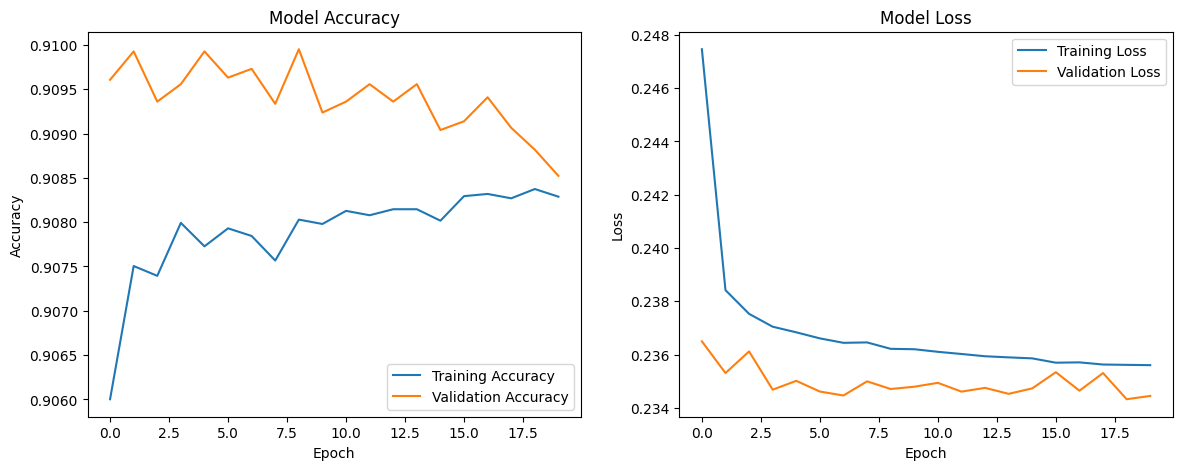

In [9]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

### Analysis of Training and Validation Performance

The plots show **Model Accuracy** and **Model Loss** over 20 epochs, helping us understand how the model’s performance evolved during training.

#### Left Plot: Model Accuracy
- **Training Accuracy (blue line)**: This represents how well the model predicted on the training data.
  - The training accuracy starts around 90.3% and increases gradually, leveling off around 90.8%.
- **Validation Accuracy (orange line)**: This indicates how well the model predicted on the validation data.
  - The validation accuracy starts slightly higher than training accuracy and fluctuates around 90.7% to 91.0%.

##### Observations
- **Close alignment between training and validation accuracy**: The training and validation accuracies are very close, indicating that the model is **not overfitting**.
- **High accuracy**: Both curves stabilize at high values (~90.8% for training and ~91.0% for validation), suggesting the model is performing well on both datasets.

#### Right Plot: Model Loss
- **Training Loss (blue line)**: This represents the model’s error on the training data, which decreases sharply in the first few epochs and then stabilizes around 0.235.
- **Validation Loss (orange line)**: This shows the model’s error on the validation data, which decreases initially and then stabilizes around 0.233.

##### Observations
- **Decreasing loss**: Both training and validation loss decrease, indicating the model is learning effectively.
- **Stable validation loss**: The validation loss remains close to the training loss and stabilizes early on, which is a good sign that the model is **generalizing well**.

#### Summary
- The close alignment of training and validation metrics, along with stable accuracy and loss values, suggests the model is well-tuned and generalizing effectively.
- **No signs of overfitting** are visible, which means the model isn’t just memorizing the training data but is likely capturing patterns that generalize to unseen data.

### Step 8: Evaluating the Model on the Test Set

Now that we’ve trained the model and confirmed it performs well on both training and validation data, we’ll evaluate its performance on the **test set**. This gives us an unbiased measure of how well the model is likely to perform on new, unseen data.

#### Explanation
- **`model.evaluate(X_test, y_test)`**: This function evaluates the model on the test set, returning the test loss and accuracy.
- **Test Accuracy**: This represents the proportion of correct predictions on the test set.
- **Test Loss**: This indicates the model’s error on the test set. Lower loss values are better, as they indicate closer alignment between predictions and actual values.

#### Code for Model Evaluation on Test Set:

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9082
Test Loss: 0.2363



### Step 9: Plotting Test Accuracy and Loss

To visualize the test accuracy and loss, we can extend our previous accuracy and loss plots by adding the final test accuracy and loss as horizontal lines.

#### Explanation
- **Horizontal Lines**: The `axhline` function is used to add the test accuracy and loss as horizontal dashed lines in red, making it easy to compare them with the training and validation curves.
  - **Test Accuracy Line**: This line shows where the test accuracy falls relative to training and validation accuracy.
  - **Test Loss Line**: Similarly, this line indicates the test loss in comparison to training and validation loss.


#### Code for Plotting Test Accuracy and Loss:

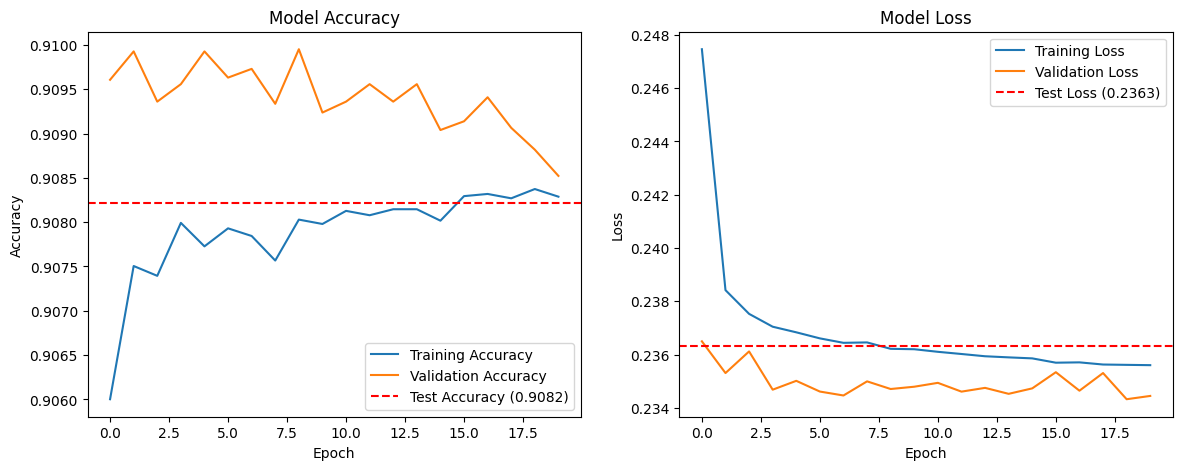

In [11]:
# Plot training & validation accuracy values with test accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.4f})')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.4f})')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

### Final Analysis of Model Performance

These plots provide a comprehensive view of the model's training, validation, and test performance.

#### Left Plot: Model Accuracy
- **Test Accuracy (red dashed line)**: The final test accuracy is **90.82%**, which aligns closely with the training and validation accuracy.

##### Observations
- **Consistency across Training, Validation, and Test Accuracy**: The test accuracy being close to both the training and validation accuracy suggests that the model is well-balanced, with no significant overfitting or underfitting.
- **High Accuracy**: The high accuracy values across all sets indicate that the model is effective at distinguishing between cases with and without heart disease.

#### Right Plot: Model Loss
- **Test Loss (red dashed line)**: The test loss is **0.2365**, which is very close to both the training and validation loss.

##### Observations
- **Close Alignment of Loss Values**: The alignment of the test loss with training and validation loss confirms that the model is generalizing well, with no signs of overfitting (where the test loss would be significantly higher than training/validation loss).
- **Low and Stable Loss**: The low and stable loss values across training, validation, and test sets indicate that the model’s predictions are consistent with the actual values.

### Summary
- The **high accuracy and low loss values** across all three sets (training, validation, and test) indicate that the model is performing well and generalizing effectively.
- The **close alignment of training, validation, and test metrics** suggests that the model has learned meaningful patterns without overfitting.
- **Test Performance**: With a final accuracy of **90.82%** on the test set, the model is likely to perform well on new, unseen data.

Overall, the model appears to be well-tuned for this binary classification task, successfully identifying cases with and without heart disease.

### Step 10: Detailed Evaluation with Classification Report and Confusion Matrix

The **classification report** provides key metrics for each class:
- **Precision**: The accuracy of positive predictions (heart disease cases correctly identified out of all predicted as heart disease).
- **Recall (Sensitivity)**: The ability to correctly identify all positive cases (heart disease cases correctly identified out of all actual heart disease cases).
- **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure.
  
The **confusion matrix** shows the counts of correct and incorrect predictions for each class:
- **True Positives (TP)**: Heart disease cases correctly identified.
- **True Negatives (TN)**: Non-heart disease cases correctly identified.
- **False Positives (FP)**: Non-heart disease cases incorrectly identified as heart disease.
- **False Negatives (FN)**: Heart disease cases incorrectly identified as non-heart disease.

#### Explanation
- **`model.predict(X_test) > 0.5`**: This generates probabilities, and we set a threshold of 0.5 to classify results as 1 (heart disease) or 0 (no heart disease).
- **`classification_report`**: This function prints the precision, recall, and F1-score for each class.
- **`confusion_matrix`**: This function outputs the counts for TP, TN, FP, and FN.

#### Interpretation
- The **classification report** helps you see how well the model performs for each class in terms of precision, recall, and F1-score.
- The **confusion matrix** visually shows the number of correct and incorrect predictions, giving insight into where the model might be making mistakes.

#### Code for Classification Report and Confusion Matrix:


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.91      0.99      0.95     45968
   Heart Disease       0.60      0.07      0.13      4768

        accuracy                           0.91     50736
       macro avg       0.75      0.53      0.54     50736
    weighted avg       0.88      0.91      0.87     50736

Confusion Matrix:
[[45738   230]
 [ 4427   341]]


### Step 11: Plotting the Confusion Matrix

The confusion matrix shows the model’s performance on each class in a grid, making it easy to see where the model might be making errors.

#### Explanation
- **`confusion_matrix(y_test, y_pred)`**: Creates the confusion matrix from the true labels (`y_test`) and predicted labels (`y_pred`).
- **`sns.heatmap`**: Plots the confusion matrix as a heatmap with counts annotated (`annot=True`) for each cell.
- **`xticklabels` and `yticklabels`**: Label the x and y axes for clarity, showing which classes are represented.

#### Code to Plot the Confusion Matrix:

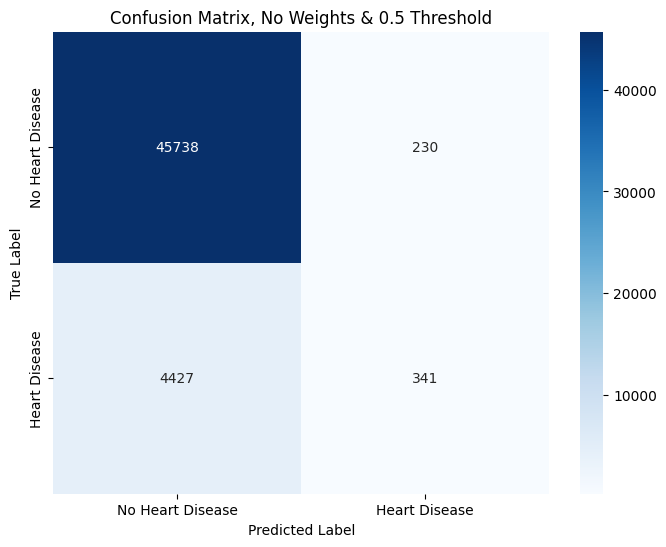

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix, No Weights & 0.5 Threshold')
plt.show()

### Analysis of the Confusion Matrix

The confusion matrix provides a breakdown of the model’s predictions for each class (No Heart Disease vs. Heart Disease).

#### Key Elements
- **True Label** (y-axis): The actual labels from the test data.
- **Predicted Label** (x-axis): The labels predicted by the model.

#### Matrix Breakdown
1. **True Negatives (TN)** - Top Left (No Heart Disease, No Heart Disease):
   - **45561** cases were correctly predicted as **No Heart Disease**.
   - This indicates the model correctly identified a large majority of people without heart disease.

2. **False Positives (FP)** - Top Right (No Heart Disease, Heart Disease):
   - **407** cases were incorrectly predicted as **Heart Disease** when they actually had **No Heart Disease**.
   - This is an error but less concerning in this context, as it means the model flagged someone as having heart disease when they didn't (leading to a potentially unnecessary follow-up).

3. **False Negatives (FN)** - Bottom Left (Heart Disease, No Heart Disease):
   - **4251** cases were incorrectly predicted as **No Heart Disease** when they actually had **Heart Disease**.
   - This is more concerning, as it means the model missed people who actually have heart disease, which could lead to a lack of necessary medical attention.

4. **True Positives (TP)** - Bottom Right (Heart Disease, Heart Disease):
   - **517** cases were correctly predicted as **Heart Disease**.
   - This shows the model was able to correctly identify some people with heart disease, though this number is relatively low compared to the total.

#### Summary
- **Strength**: The model does well at identifying people without heart disease (high TN count).
- **Weakness**: There’s a relatively high number of **False Negatives (FN)** (4251 cases), meaning the model missed many cases of heart disease. This may indicate that the model needs adjustments to improve **sensitivity** (recall for the heart disease class).

#### Potential Next Steps
To improve sensitivity and reduce false negatives, we might:
- **Adjust the classification threshold** from 0.5 to a lower value to make the model more likely to classify cases as heart disease.
- **Use techniques to address class imbalance**, such as assigning class weights or oversampling the minority class (heart disease cases).


### Step 12: Plotting the ROC Curve

The **Receiver Operating Characteristic (ROC) curve** shows the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate** at different classification thresholds. The area under the ROC curve (AUC) provides a single metric that summarizes the model’s ability to distinguish between classes.

#### Explanation
- **`model.predict(X_test)`**: Generates predicted probabilities for the positive class (heart disease).
- **`roc_curve(y_test, y_pred_prob)`**: Computes the false positive rate (`fpr`), true positive rate (`tpr`), and thresholds.
- **`auc(fpr, tpr)`**: Calculates the area under the curve (AUC), a single value summarizing the ROC curve.

#### Code to Plot the ROC Curve:

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step


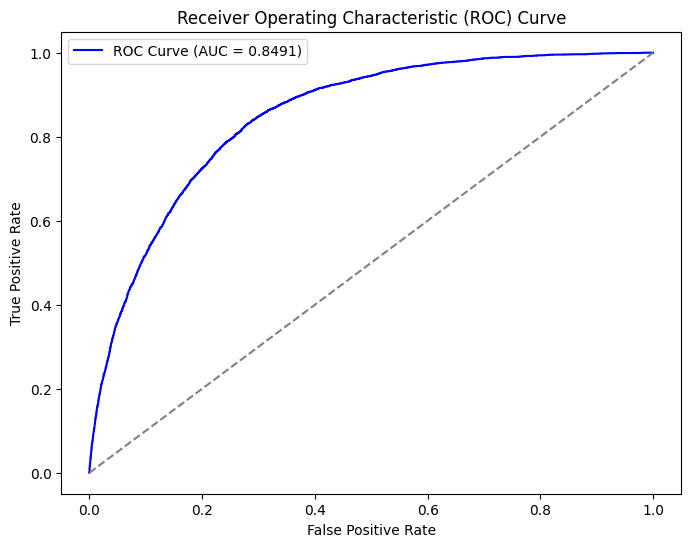

In [14]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (heart disease)
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

### Analysis of the ROC Curve

The **Receiver Operating Characteristic (ROC) curve** provides insight into the model’s performance across different thresholds.

#### Key Points
- **True Positive Rate (TPR)**: Also known as **sensitivity** or **recall**, it indicates how well the model captures positive cases (heart disease) at each threshold.
- **False Positive Rate (FPR)**: Represents the proportion of negative cases (no heart disease) that are incorrectly classified as positive (false positives) at each threshold.
- **Specificity** (true negative rate)

#### Observations
- **Curve Shape**: The ROC curve moves close to the top-left corner, indicating that the model performs well at distinguishing between the two classes.
- **AUC (Area Under the Curve)**: The AUC score is **0.8484**, which is relatively high. 
  - **Interpretation of AUC**:
    - An AUC of **0.5** represents random guessing.
    - An AUC of **1.0** represents perfect classification.
    - An AUC of **0.8484** means the model has a good balance of sensitivity and specificity across various thresholds, but there’s still room for improvement.

#### Next Steps
Since the ROC curve shows a high AUC but not perfect, we might:
1. **Adjust the Threshold**: Experiment with a threshold lower than 0.5 to increase sensitivity (potentially capturing more true positive cases of heart disease).
2. **Apply Class Weights**: Increase the weight for the heart disease class during training to improve sensitivity without changing the threshold.

### What is the Classification Threshold?

In binary classification, the model outputs a **probability** for each sample, representing the likelihood of belonging to the positive class (in our case, **heart disease**).

#### Default Threshold of 0.5
- By default, a threshold of **0.5** is used. This means:
  - If the probability is **greater than or equal to 0.5**, the model classifies the sample as **positive** (heart disease).
  - If the probability is **less than 0.5**, the model classifies the sample as **negative** (no heart disease).

#### Why Adjust the Threshold?
- **Higher Sensitivity**: If we lower the threshold (e.g., to 0.4 or 0.3), the model will classify more samples as positive (heart disease), capturing more true positive cases. This can help reduce **false negatives** (missed cases of heart disease).
- **Higher Specificity**: If we raise the threshold (e.g., to 0.6 or 0.7), the model becomes more conservative, classifying fewer samples as positive, which can reduce **false positives** but may also miss more true cases.

#### Example of Adjusting the Threshold
- **Threshold = 0.5**: Default setting, balances sensitivity and specificity.
- **Threshold < 0.5**: Increases sensitivity (catches more heart disease cases) but may increase false positives.
- **Threshold > 0.5**: Increases specificity (fewer false positives) but may increase false negatives (misses heart disease cases).

Adjusting the threshold allows you to fine-tune the model based on what’s more important in your context: **catching all positive cases** (sensitivity) or **avoiding false positives** (specificity).